<a href="https://colab.research.google.com/github/kayahardie/PartIIIProject/blob/main/Submit_single_Chain_Plots_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
from numpy import pi
import itertools
from numpy import linalg as LA
from scipy import stats
from scipy import optimize
import multiprocessing as mp
import shutil
import subprocess as sp
import math
from statsmodels.iolib.table import SimpleTable, default_txt_fmt

In [ ]:
cycle_n = 100
equilibrium = 1000000
timestep_param = 50000
cycle_steps = 60000000
shuff = [1, 2, 3, 4, 5, 6]

In [ ]:
temps = np.arange(2, 0, -0.02)

In [ ]:
seqs = {'Sequence_1': [0, 1, 12], 'Sequence_2': [0, 2, 12], 'Sequence_3': [0, 3, 12], 'Sequence_4': [0, 4, 12], 'Sequence_5': [0, 5, 12], 'Sequence_6': [0, 6, 12]}

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_1
[ 0.  0.  0. ... 99. 99. 99.]


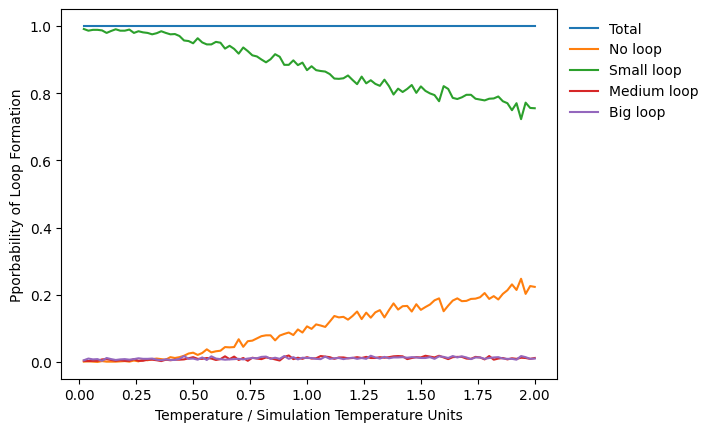

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_2
[ 0.  0.  0. ... 99. 99. 99.]


<Figure size 640x480 with 0 Axes>

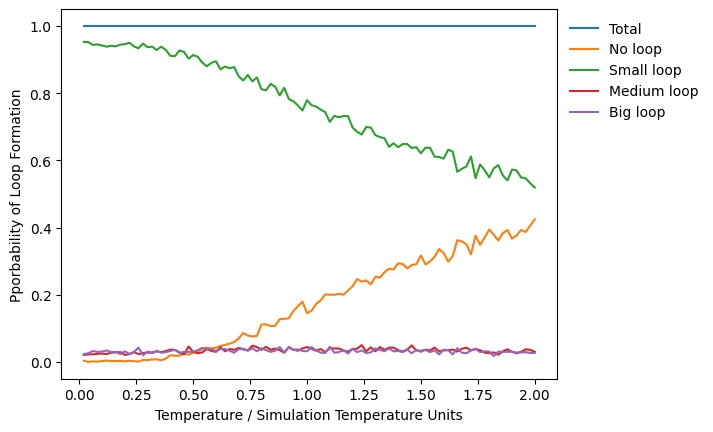

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_3
[ 0.  0.  0. ... 99. 99. 99.]


<Figure size 640x480 with 0 Axes>

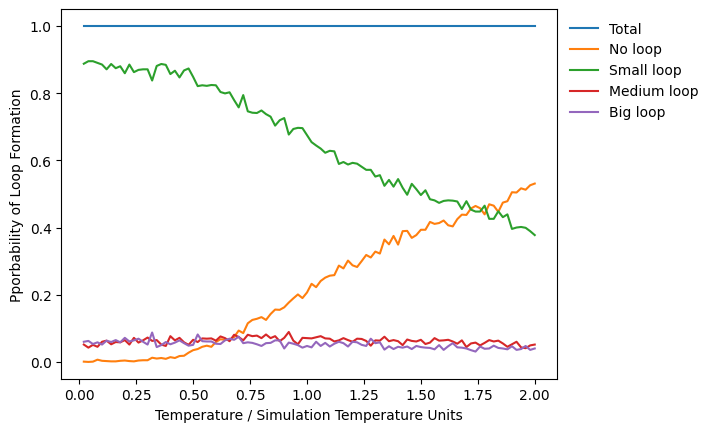

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_4
[ 0.  0.  0. ... 99. 99. 99.]


<Figure size 640x480 with 0 Axes>

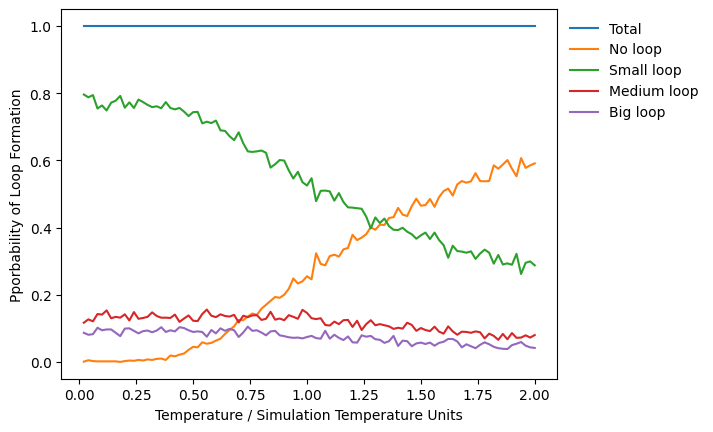

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_5
[ 0.  0.  0. ... 99. 99. 99.]


<Figure size 640x480 with 0 Axes>

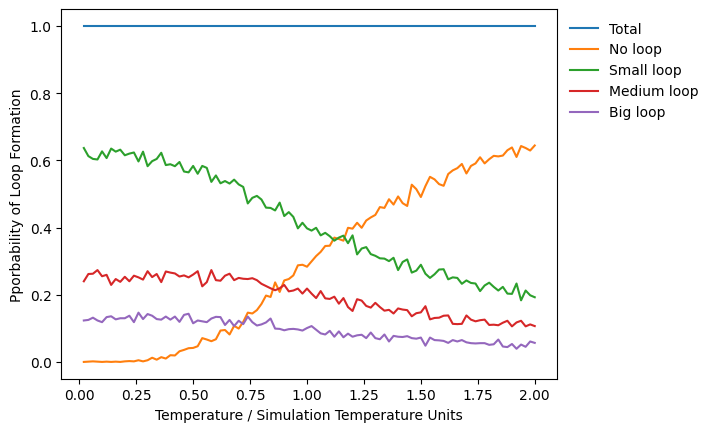

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_6
[ 0.  0.  0. ... 99. 99. 99.]


<Figure size 640x480 with 0 Axes>

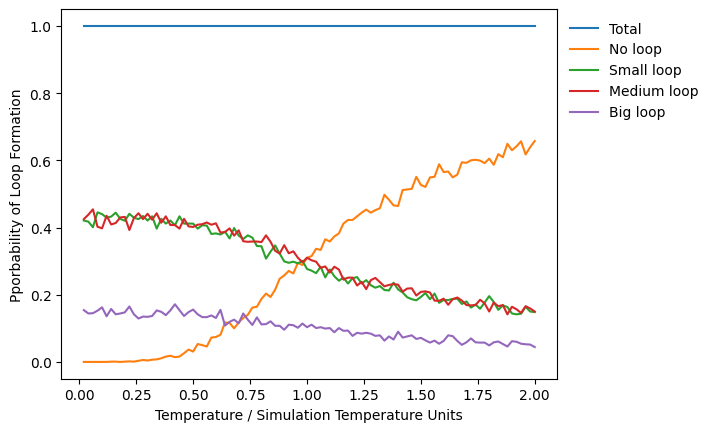

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in shuff:
    path = f'/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_{i}'
    %cd $path
    file = 'results_trj.lammpstrj'

    T = []
    BegLink = []
    MidLink = []
    EndLink = []
    j = f'Sequence_{i}'
    sequence_data = seqs[j]

    with open(file) as trj:

        tot_file = trj.readlines()
        tot_file = iter(tot_file)

        for a_line in tot_file:

            if a_line == 'ITEM: TIMESTEP\n':                   # Record timesteps
                a_line = next(tot_file)
                timestep = int(a_line[:-1])
                T.append(timestep)

            if a_line == 'ITEM: ATOMS id type mol x y z bP\n': # Record positions and bonds for each time step
                a_line = next(tot_file)
                m_line = a_line.split(" ")
                BegLink.append(int(m_line[-1]))

            if a_line.split(" ")[0] == str(sequence_data[1]):
                m_line = a_line.split(" ")
                MidLink.append(int(m_line[-1]))

            if a_line.split(" ")[0] == str(sequence_data[2]):
                m_line = a_line.split(" ")
                EndLink.append(int(m_line[-1]))

    BegLink = np.array(BegLink)
    MidLink = np.array(MidLink)
    EndLink = np.array(EndLink)

    section_index = (np.array(T)//timestep_param - equilibrium/timestep_param - 1) // (cycle_steps/timestep_param)
    #Time step between recordings, equillibium time count/time step between recordings, -1, number of counts per temperature

    print(section_index)

    big = []
    sma = []
    med = []
    noo = []
    tot = []

    for j in range(cycle_n):

        _AllLink = (section_index == j)
        tot.append(sum(_AllLink))

        _BegLink = BegLink[_AllLink]
        _MidLink = MidLink[_AllLink]
        _EndLink = EndLink[_AllLink]

        beg_connected = (_BegLink != -1)
        mid_connected = (_MidLink != -1)
        end_connected = (_EndLink != -1)

        big_loop = (beg_connected & end_connected)
        sma_loop = (beg_connected & mid_connected)
        med_loop = (mid_connected & end_connected)
        noo_loop = ((beg_connected | mid_connected | end_connected) == False)

        big.append(sum(big_loop))
        sma.append(sum(sma_loop))
        med.append(sum(med_loop))
        noo.append(sum(noo_loop))

    #plotting
    plt.figure()
    plt.plot(temps, np.array(tot)/(cycle_steps/timestep_param), label = 'Total')
    plt.plot(temps, np.array(noo)/(cycle_steps/timestep_param), label = 'No loop')
    plt.plot(temps, np.array(sma)/(cycle_steps/timestep_param), label = 'Small loop')
    plt.plot(temps, np.array(med)/(cycle_steps/timestep_param), label = 'Medium loop')
    plt.plot(temps, np.array(big)/(cycle_steps/timestep_param), label = 'Big loop')
    #plt.plot(np.array(med)/(cycle_steps/timestep_param), label = 'Medium loop')
    #Have removed the big and medium loop combined
    #plt.plot(np.array(big)/(cycle_steps/timestep_param) + np.array(med)/(cycle_steps/timestep_param), label = 'big n med loop')

    # X and Y-Axis Labels
    plt.xlabel('Temperature / Simulation Temperature Units')
    plt.ylabel('Pporbability of Loop Formation')

    # Legend with 'best' location
    plt.legend(loc='upper right')

    # Title (if needed)
    #plt.title('Your Plot Title')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

    # Set a filename based on the value from the 'seqs' dictionary
    name = f'NEW_{i}.png'
    plt.show()
    # Save the plot with the generated filename
    plt.savefig(name, bbox_inches='tight')